In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#imprting necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns
import plotly as plty

In [ ]:
#loading the primary dataset
df = pd.read_csv('/content/drive/MyDrive/SPD_Crime_Data__2008-Present_20241028.csv')

In [ ]:
#dropping unnecessary columns
df = df.drop(columns=["Offense End DateTime"])

In [ ]:
#dropping null values from the dataset
df = df.dropna()

In [ ]:
# Convert 'Offense Start DateTime' to datetime format
df['Offense Start DateTime'] = pd.to_datetime(df['Offense Start DateTime'], format='%m/%d/%Y %I:%M:%S %p')

# Extract 'Offense Start Date' and 'Offense Start Time'
df['Offense Start Date'] = df['Offense Start DateTime'].dt.date
df['Offense Start Time'] = df['Offense Start DateTime'].dt.strftime('%I:%M:%S %p')

In [ ]:
df.columns

Index(['Report Number', 'Offense ID', 'Offense Start DateTime',
       'Report DateTime', 'Group A B', 'Crime Against Category',
       'Offense Parent Group', 'Offense', 'Offense Code', 'Precinct', 'Sector',
       'Beat', 'MCPP', '100 Block Address', 'Longitude', 'Latitude',
       'Offense Start Date', 'Offense Start Time'],
      dtype='object')

In [ ]:
# Replace 'w' with 'W' in all columns
df = df.replace('w', 'W', regex=True)

# Replace 'OOJ' and 'Northgate' with 'UNKNOWN' in all columns
df = df.replace(['OOJ', 'NORTHGATE'], 'UNKNOWN', regex=True)
df = df.drop(df[df['Precinct'] == 'UNKNOWN'].index)
df.columns

print(df['Precinct'].unique())

['W' 'N' 'SW' 'E' 'S']


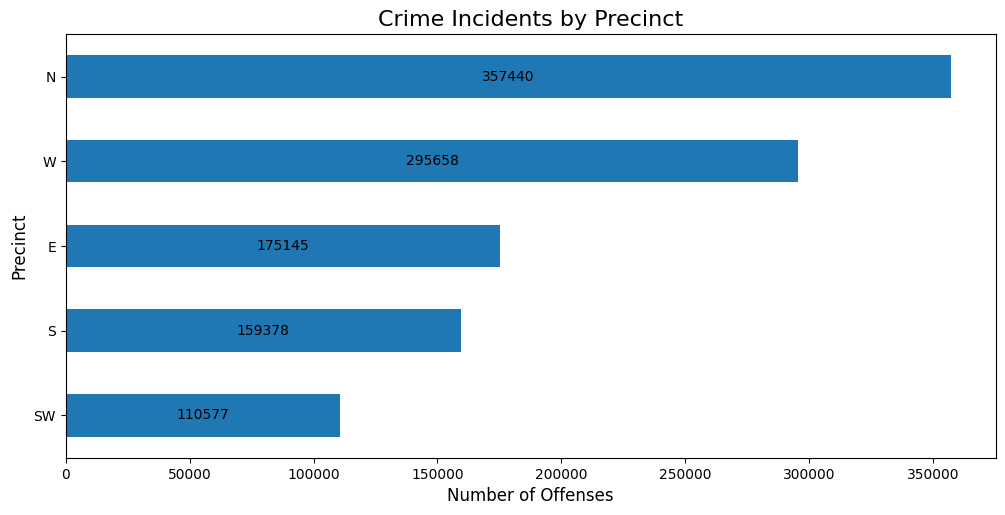

In [ ]:
# Group by Precinct
precinct_counts = df['Precinct'].value_counts()

# Plot
plt.figure(figsize=(12, 5.5))
bars = precinct_counts.sort_values(ascending=True).plot(kind='barh')

# Add the number of crimes as text labels on the bars
for index, value in enumerate(precinct_counts.sort_values(ascending=True)):
    plt.text(value / 2,  # Position the text at the center of the bar
             index,      # Align text with the y-axis (bars)
             str(value), # Text to display (crime count)
             va='center', ha='center', fontsize=10, color='black')  # Center alignment and white color

# Add title, labels, and formatting
plt.title('Crime Incidents by Precinct', fontsize=16)
plt.xlabel('Number of Offenses', fontsize=12)
plt.ylabel('Precinct', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

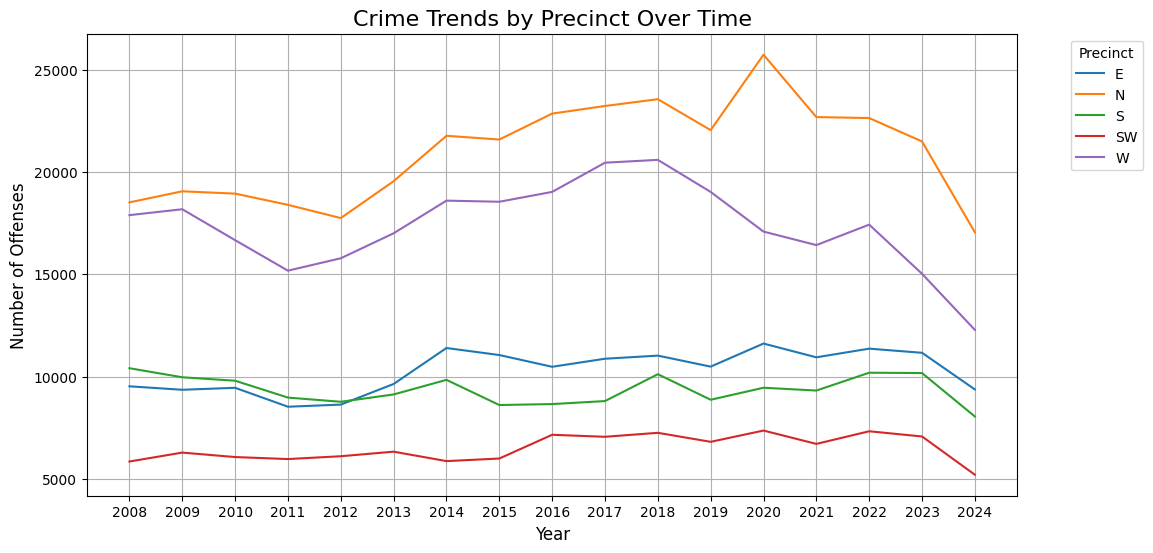

In [ ]:
# Extract year from 'Offense_Start_Date' (assuming 'Offense_Start_Date' is already in datetime format)
df['Offense_Start_Year'] = pd.to_datetime(df['Offense Start DateTime']).dt.year

# Filter the dataframe to include only the years between 2008 and 2024
df_filtered = df[df['Offense_Start_Year'].between(2008, 2024)]

# Group by year and precinct
precinct_time = df_filtered.groupby(['Offense_Start_Year', 'Precinct']).size().unstack()

# Plot line chart
precinct_time.plot(figsize=(12, 6))
plt.title('Crime Trends by Precinct Over Time',fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Offenses',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Precinct', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the x-axis to display only the years from 2008 to 2024
plt.xticks(range(2008, 2025))
plt.grid(True)
plt.show()


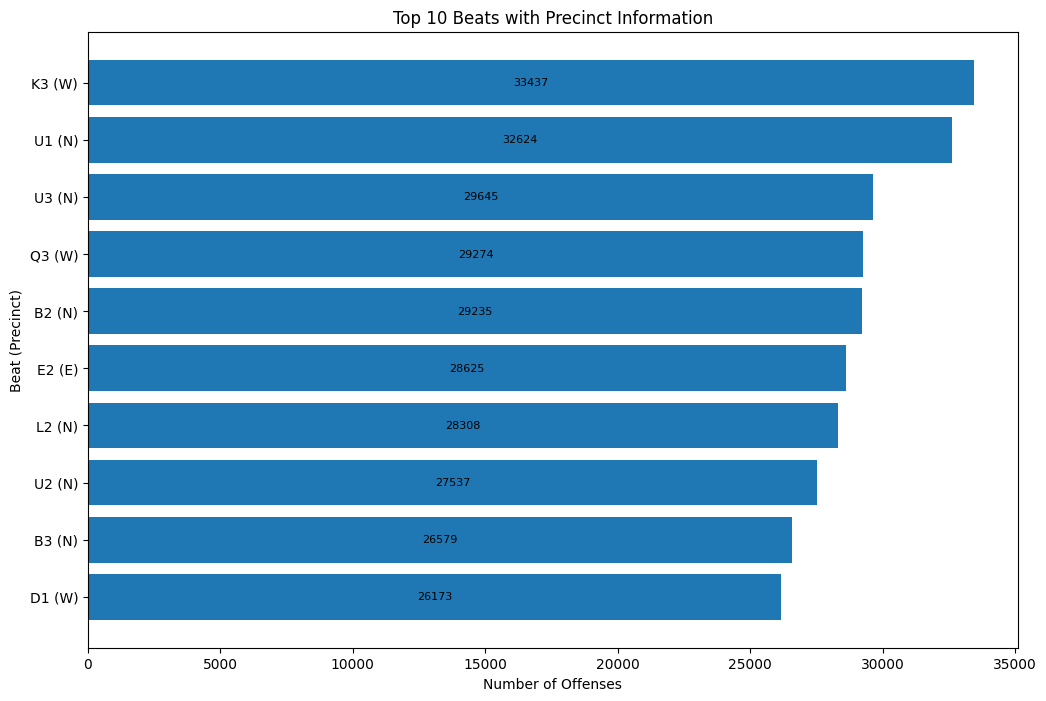

In [ ]:
#Bar chart for Top 10 Beats

# Group by both Beat and Precinct, then count incidents
location_counts = df.groupby(['Beat', 'Precinct']).size().reset_index(name='counts')

# Get the top 10 Beat-Precinct combinations with the highest crime counts
top_10_locations = location_counts.nlargest(10, 'counts').sort_values(by=['counts'], ascending=True)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size as needed

# Create horizontal bar chart
plt.barh(top_10_locations['Beat'] + ' (' + top_10_locations['Precinct'] + ')', top_10_locations['counts'])

# Customize chart elements
plt.title('Top 10 Beats with Precinct Information')
plt.xlabel('Number of Offenses')
plt.ylabel('Beat (Precinct)')
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', fontsize=8)  # Add labels to bars
plt.show()

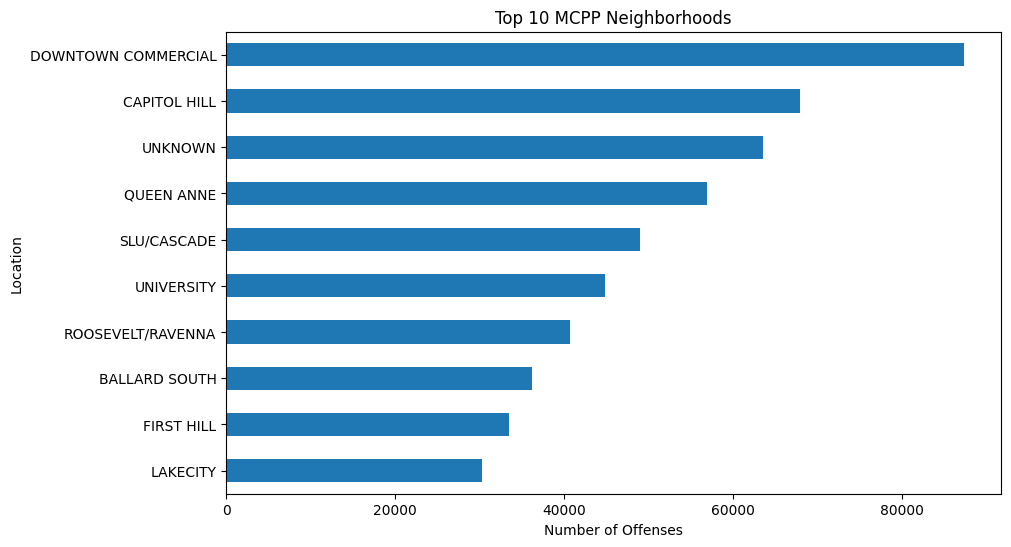

In [ ]:
#Bar chart for Top 10 MCPP Neighborhoods

#filtering top 10 values of MCPP Neighborhood in descending order
location_counts = df['MCPP'].value_counts().head(10).sort_values(ascending=True)

#plotting bar chart
plt.figure(figsize=(10, 6))
location_counts.plot(kind='barh')
plt.title('Top 10 MCPP Neighborhoods')
plt.xlabel('Number of Offenses')
plt.ylabel('Location')
plt.show()

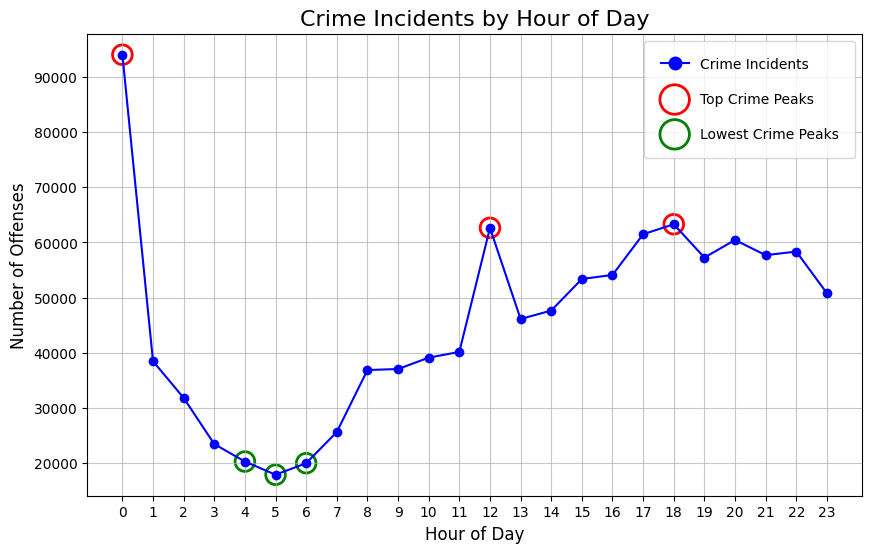

In [ ]:
# Extract the hour from the datetime column
df['Hour'] = pd.to_datetime(df['Offense Start DateTime']).dt.hour
hourly_crime = df['Hour'].value_counts().sort_index()

# Find the top 3 peak hours (highest)
top_3_peaks = hourly_crime.nlargest(3)

# Find the bottom 3 peak hours (lowest)
bottom_3_peaks = hourly_crime.nsmallest(3)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_crime.index, hourly_crime.values, marker='o', label='Crime Incidents', color='blue')

# Highlight the top 3 peak hours with red hollow circles
plt.scatter(top_3_peaks.index, top_3_peaks.values, color='red', s=200, edgecolor='red', facecolors='none', linewidth=2, label='Top Crime Peaks')

# Highlight the bottom 3 peak hours with green hollow circles
plt.scatter(bottom_3_peaks.index, bottom_3_peaks.values, color='green', s=200, edgecolor='green', facecolors='none', linewidth=2, label='Lowest Crime Peaks')

# Add title, labels, and grid
plt.title("Crime Incidents by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Offenses", fontsize=12)
plt.xticks(range(24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.legend(fontsize=10, loc='upper right', markerscale=1.5, frameon=True, borderpad=1.2, labelspacing=1.5)
plt.show()


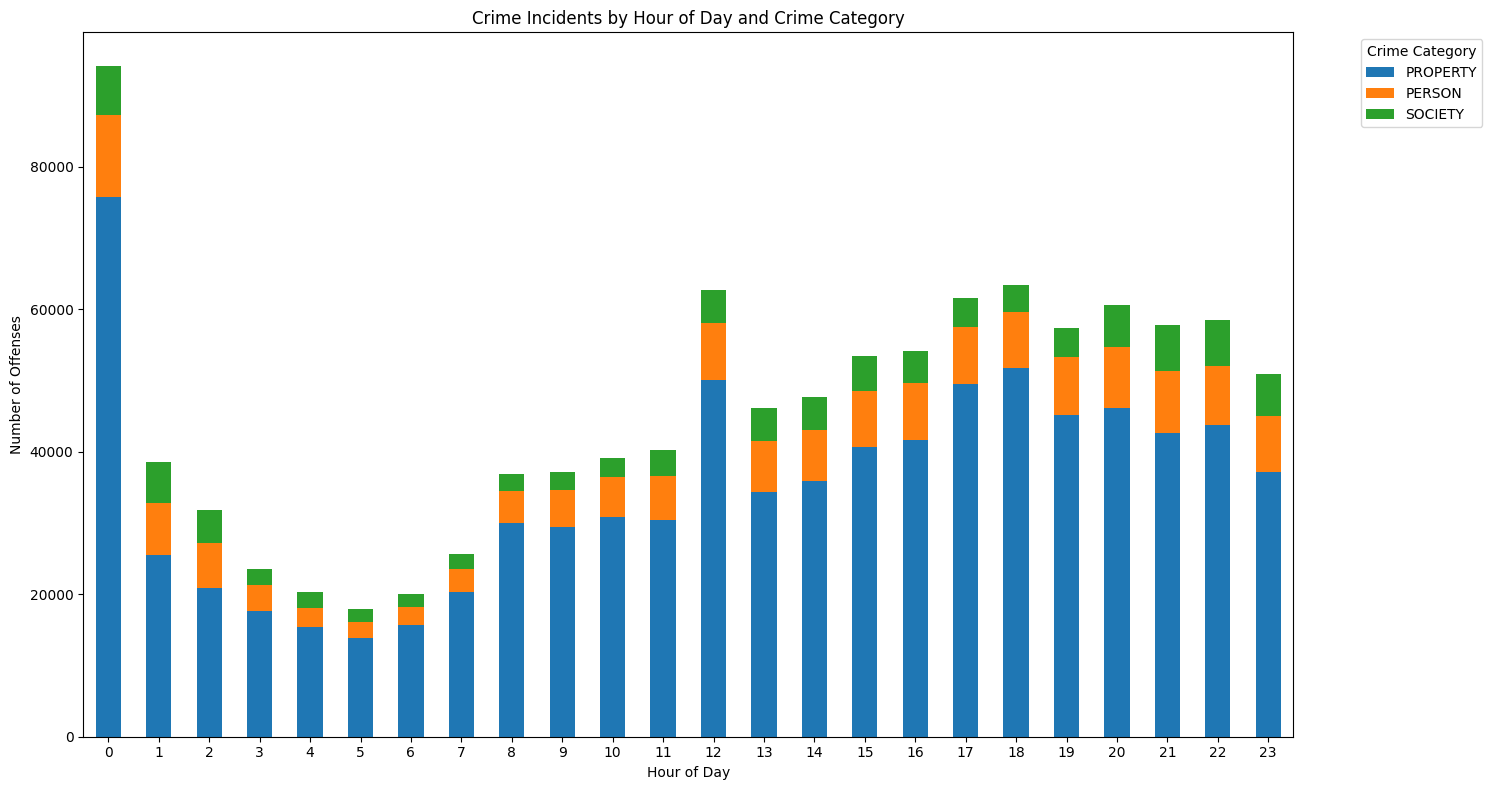

In [ ]:
#Bar chart for Crime Incidents by Hour of Day and Crime Category

#Creating a hour column from Offense Start DateTime
df['Hour'] = pd.to_datetime(df['Offense Start DateTime']).dt.hour

# Grouping the data by hour and crime against category
hourly_crime_category = df.groupby(['Hour','Crime Against Category']).size().unstack()

# Calculating total offenses for each crime category
category_totals = hourly_crime_category.sum()

# Sorting crime categories by total offenses in descending order
sorted_categories = category_totals.sort_values(ascending=False).index

# Reordering columns in hourly_crime_category based on sorted categories
hourly_crime_category = hourly_crime_category[sorted_categories]

# Plotting the bar chart with sorted categories
hourly_crime_category.plot(kind='bar', figsize=(15, 8), stacked=True)
plt.title('Crime Incidents by Hour of Day and Crime Category')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=360)
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

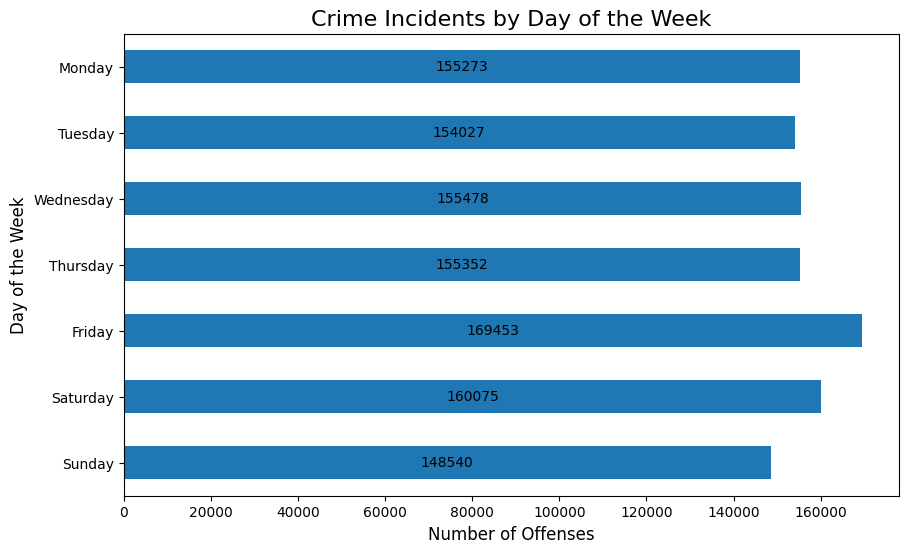

In [ ]:
df['DayOfWeek'] = pd.to_datetime(df['Offense Start DateTime']).dt.day_name()
day_of_week_counts = df['DayOfWeek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig, ax = plt.subplots(figsize=(10, 6))  # Create figure and axes
day_of_week_counts.plot(kind='barh', ax=ax)  # Plot on the axes

ax.bar_label(ax.containers[0], fmt='%d', label_type='center') # Add labels

plt.title("Crime Incidents by Day of the Week", fontsize=16)
plt.xlabel("Number of Offenses", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

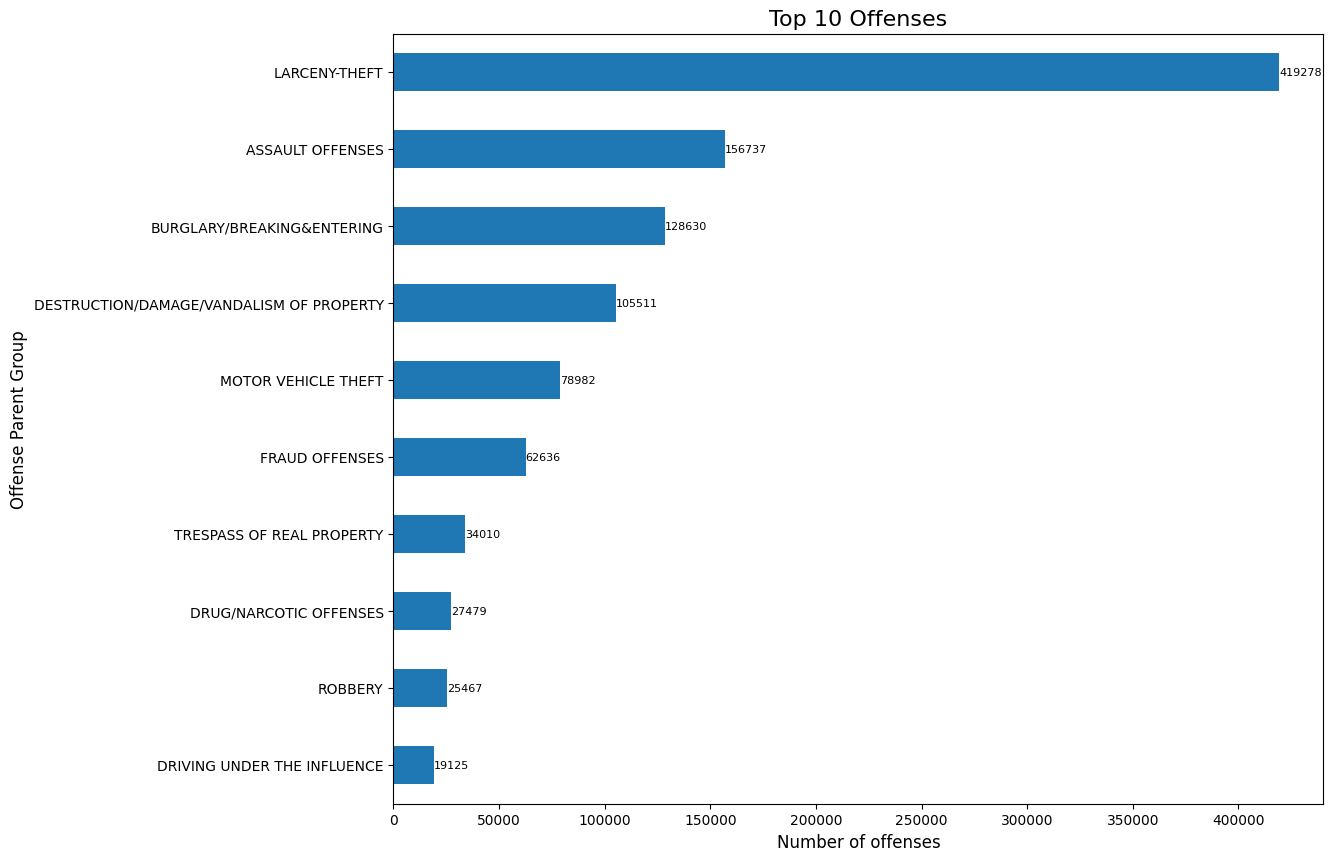

In [ ]:
#Bar chart of top 10 offenses

#filtering top 10 offense groups
top_offenses = df['Offense Parent Group'].value_counts().head(10).sort_values(ascending=True)

#plotting a bar chart
fig, ax = plt.subplots(figsize=(12, 10))
top_offenses.plot(kind='barh', ax=ax)
plt.title('Top 10 Offenses', fontsize=16)
plt.xlabel('Number of offenses', fontsize=12)
plt.ylabel('Offense Parent Group', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', fontsize=8)
plt.show()

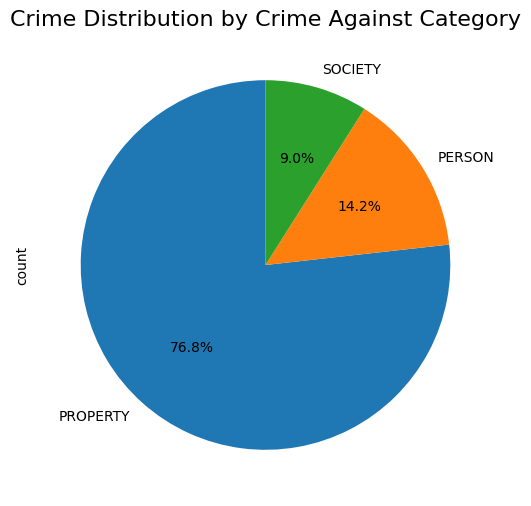

In [ ]:
#Pie chart of Crime Against Category

#counting the values of crime against category
crime_against_counts = df['Crime Against Category'].value_counts()

#plotting pie chart
plt.figure(figsize=(8, 6))
crime_against_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Crime Distribution by Crime Against Category", fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

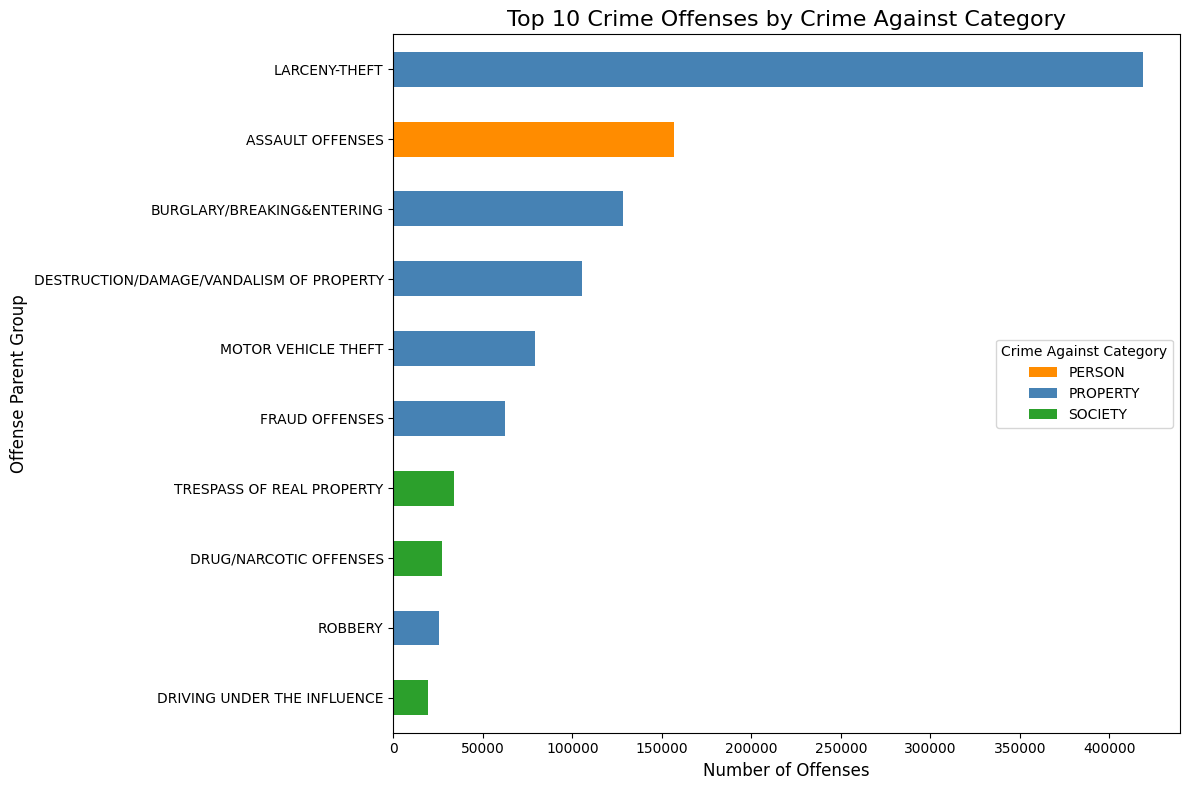

In [ ]:
# Get the top 10 offenses
top_offenses = df['Offense Parent Group'].value_counts().nlargest(10).index
top_offenses_data = df[df['Offense Parent Group'].isin(top_offenses)]

# Group data by 'Offense Parent Group' and 'Crime Against Category'
grouped_data = top_offenses_data.groupby(['Offense Parent Group', 'Crime Against Category']).size().unstack(fill_value=0)

# Sort the grouped data by the total count (descending order)
grouped_data['Total'] = grouped_data.sum(axis=1)  # Add a 'Total' column
grouped_data = grouped_data.sort_values(by='Total', ascending=True).drop(columns=['Total'])  # Sort and drop 'Total'

# Define custom colors for categories
custom_colors = {
    'PERSON': 'darkorange',
    'PROPERTY': 'steelblue',
    'SOCIETY': '#2ca02c'  # Default color for any other category
}

# Map colors to the columns (crime categories)
colors = [custom_colors.get(category) for category in grouped_data.columns]

# Plot the data
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='barh', stacked=True, figsize=(12, 8), color=colors)

# Customize title, labels, and legend
plt.title("Top 10 Crime Offenses by Crime Against Category", fontsize=16)
plt.xlabel("Number of Offenses", fontsize=12)
plt.ylabel("Offense Parent Group", fontsize=12)
plt.legend(title="Crime Against Category", loc="right", fontsize=10)
plt.tight_layout()  # Adjust layout to fit everything

# Display the plot
plt.show()


<ipython-input-33-b826e38ad87f>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(cumulative_values[i] + value / 2, i, str(int(value)), ha='center', va='center', fontsize=9)


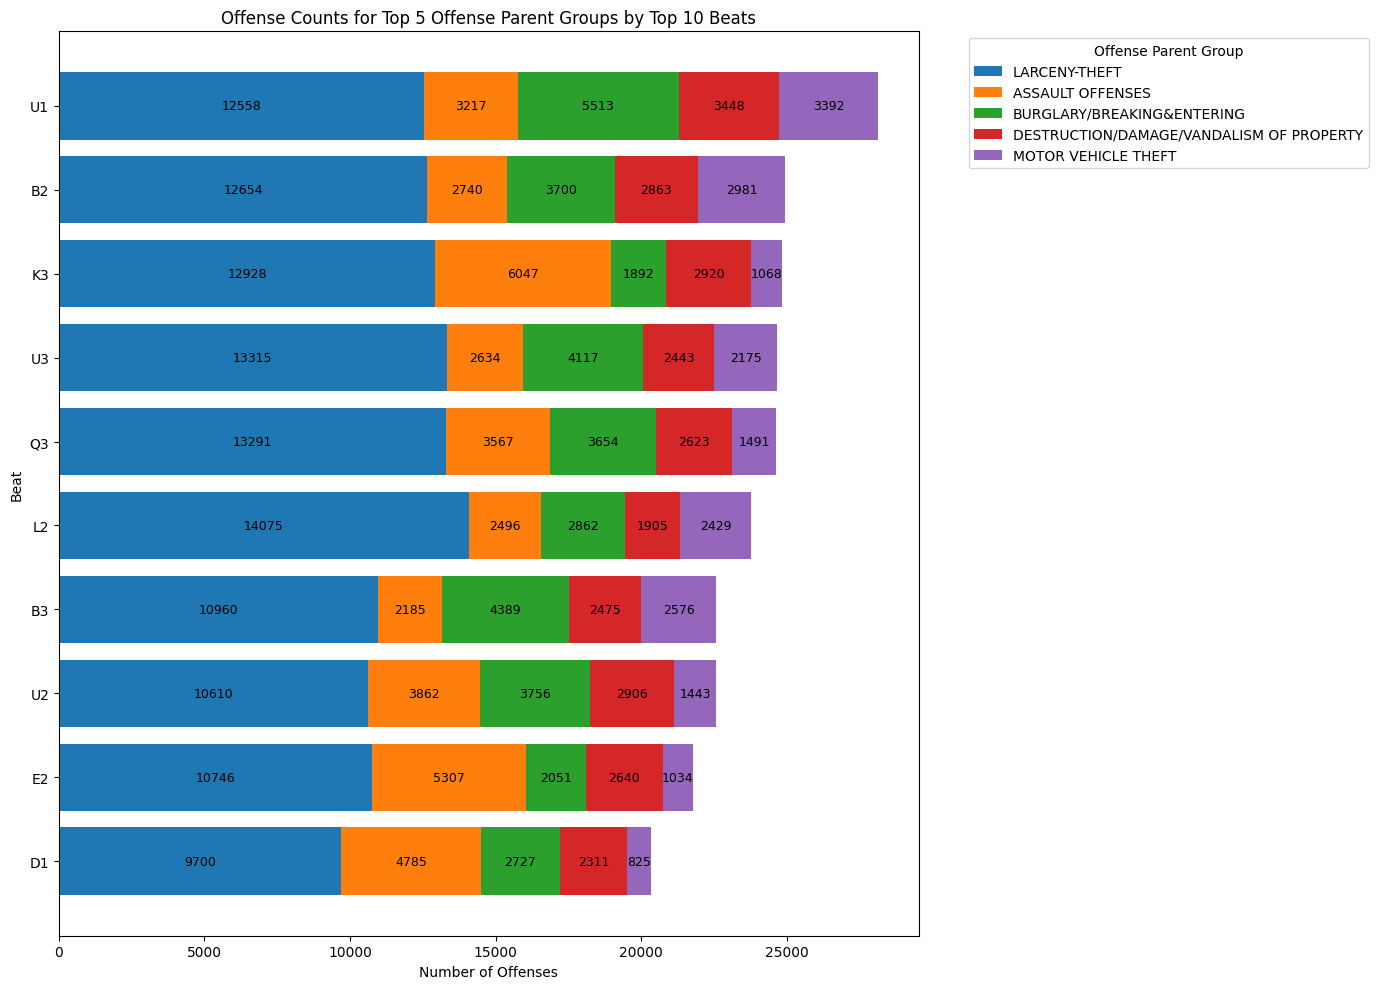

In [ ]:
#sorting data
grouped_data = df.groupby(['Offense Parent Group', 'Beat']).size().reset_index(name='Count')
top_10_beats = grouped_data.groupby('Beat')['Count'].sum().nlargest(10).index
top_5_groups = grouped_data.groupby('Offense Parent Group')['Count'].sum().nlargest(5).index
filtered_data = grouped_data[
    (grouped_data['Beat'].isin(top_10_beats)) &
    (grouped_data['Offense Parent Group'].isin(top_5_groups))
]
pivot_data = filtered_data.pivot(index='Beat', columns='Offense Parent Group', values='Count').fillna(0)
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by=['Total'], ascending=True)
pivot_data = pivot_data.drop(columns=['Total'])

# plotting graph
plt.figure(figsize=(14, 10))

# Cumulative sum to stack bars
cumulative_values = np.zeros(len(pivot_data))

# Loop through each group and stack the bars
for group in top_5_groups:
    plt.barh(pivot_data.index, pivot_data[group], left=cumulative_values, label=group)

    # Annotate each segment with its individual value
    for i, value in enumerate(pivot_data[group]):
        if value > 0:
            plt.text(cumulative_values[i] + value / 2, i, str(int(value)), ha='center', va='center', fontsize=9)

    # Update cumulative values for stacking
    cumulative_values += pivot_data[group]

plt.title('Offense Counts for Top 5 Offense Parent Groups by Top 10 Beats')
plt.xlabel('Number of Offenses')
plt.ylabel('Beat')
plt.legend(title='Offense Parent Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Importing necessary libraries for geospatial analysis
import geopandas as gpd
from shapely.geometry import Point


# Renaming the 'Report Number' column to 'ReportNumber' from the primary dataset
df.rename(columns={'Report Number': 'ReportNumber'}, inplace=True)

# Creating a new column 'rep_num' as a copy of 'ReportNumber' for further processing
df['rep_num'] = df['ReportNumber']

# Generating geometry data for each crime report from latitude and longitude
df['geometry'] = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Converting the DataFrame to a GeoDataFrame for geospatial analysis
crime_geo = gpd.GeoDataFrame(df, geometry='geometry')

# Setting the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
crime_geo.set_crs(epsg=4326, inplace=True)

# Saving the GeoDataFrame as a GeoJSON file
crime_geo.to_file("dm.json", driver="GeoJSON")  #dm - data to merge


In [ ]:
#loading the required datasets

# Loading the census block geometry data for Seattle
census = gpd.read_file('/content/drive/MyDrive/datasets/2020_Census_Blocks_-_Seattle.geojson', driver='GeoJSON')

# Loading the crime report data containing crime incidents
crime_report = gpd.read_file('/content/drive/MyDrive/dm.json', driver='GeoJSON')

# Loading the community reporting area (CRA) data for Seattle
cra = gpd.read_file('/content/drive/MyDrive/datasets/CITYPLAN_CRA_-8527542012581552321.geojson', driver='GeoJSON')

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


In [ ]:
# Performing geospatial analysis

#Merging crime report data with an primary dataset 'df' using 'Report Number' and 'rep_num' as keys
crime = crime_report.merge(df, right_on='Report Number', left_on='rep_num')

#Drop the 'rep_num' column as it is no longer needed
crime.drop('rep_num', axis=1, inplace=True)

#Spatial join to associate crime reports with census blocks
point_in_census = crime_report.sjoin(census, how="left", predicate="within")

#Aggregating crime counts by census block GEOID_20 and merging with census block geometry
census_stats_geo = point_in_census.groupby('GEOID_20').agg(total_crime_count=('NAME', 'count')).reset_index()
census_stats_geo = census.merge(census_stats_geo, on='GEOID_20')

#Filtering out CRA areas that are having water
cra = cra[cra['WATER'] == 0]

#Aggregate crime counts by CRA number and merge with CRA geometry
cra_crime_count = point_in_census.groupby('CRA_NO').agg(total_crime_count=('CRA_NO', 'count')).reset_index()
cra = cra.merge(cra_crime_count, on='CRA_NO', how='left')

#Fill missing crime counts with zero
cra['total_crime_count'] = cra['total_crime_count'].fillna(0)

#Calculating crime rate per thousand square miles for each CRA
cra['crime_per_thousand'] = (cra['total_crime_count'] / cra['AREA_SQMI']) * 1000

#Dissolving CRA data to the neighborhood district level and aggregate area and crime counts
cra_dist = cra.dissolve(
    by="NEIGHDIST",
    aggfunc={
        "AREA_ACRES": "sum",
        "total_crime_count": "sum"
    }
).reset_index()

#Printing the first five rows of the CRA-level crime statistics
print("Neighborhood Statistics (Crime):")
print(cra.head())

#Printing the first five rows of the neighborhood district-level data
print("Neighborhood District Level Data:")
print(cra_dist.head())

Neighborhood Statistics (Crime):
   OBJECTID  CRA_NO  CRA_GRP                           GEN_ALIAS  \
0         1     1.1        1                       Arbor Heights   
1         3     1.2        1                  Fauntleroy/Seaview   
2         5     1.3        1  West Seattle Junction/Genesee Hill   
3         6     1.4        1                        Alki/Admiral   
4         8     2.1        2                      North Delridge   

                                          DETL_NAMES               NEIGHDIST  \
0       Arbor Heights, Brace Point, Endolyne, Arroyo               Southwest   
1  Fauntleroy, Gatewood, Morgan Junction, Lincoln...               Southwest   
2  Seaview, Fairmount Park, Morgan Junction, Gene...               Southwest   
3                                      Alki, Admiral               Southwest   
4  North Delridge, Pigeon Point, Avalon, Luna Par...  Delridge Neighborhoods   

    AREA_ACRES  AREA_SQMI SE_ANNO_CAD_DATA  \
0   782.825789   1.223165      

<ipython-input-25-1bedddda36cc>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = cra.geometry.centroid


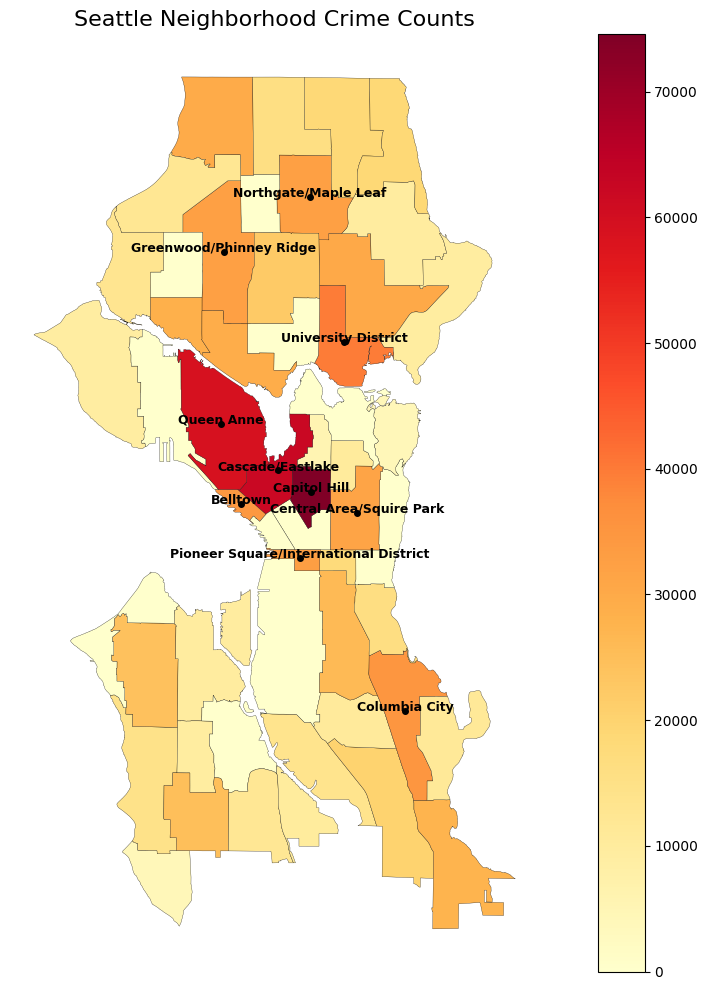

In [ ]:
#Visualizing Map for Neighborhood Crime Count
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

#Creating a normalization object to scale the color range based on crime counts
norm = Normalize(vmin=cra['total_crime_count'].min(), vmax=cra['total_crime_count'].max())
cmap = plt.cm.YlOrRd

#Plotting the choropleth map using the 'cra' GeoDataFrame
cra.plot(column='total_crime_count', cmap=cmap, linewidth=0.2, edgecolor='black', legend=True, norm=norm, ax=ax)

#Getting the top 10 neighborhoods with the highest crime counts
cra_largest_counts_df = cra.nlargest(10, 'total_crime_count')
top_10_crime_nei = cra_largest_counts_df['GEN_ALIAS'].to_list()
centroids = cra.geometry.centroid

#Iterating through neighborhoods and highlighting the top 10
for idx, row in cra.iterrows():
    if row['GEN_ALIAS'] in top_10_crime_nei:
        x, y = centroids[idx].x, centroids[idx].y
        ax.text(x, y, row['GEN_ALIAS'], fontsize=9, ha='center', color='black', weight='bold')
        ax.plot(x, y, marker='o', color='black', markersize=4)

ax.set_title("Seattle Neighborhood Crime Counts", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


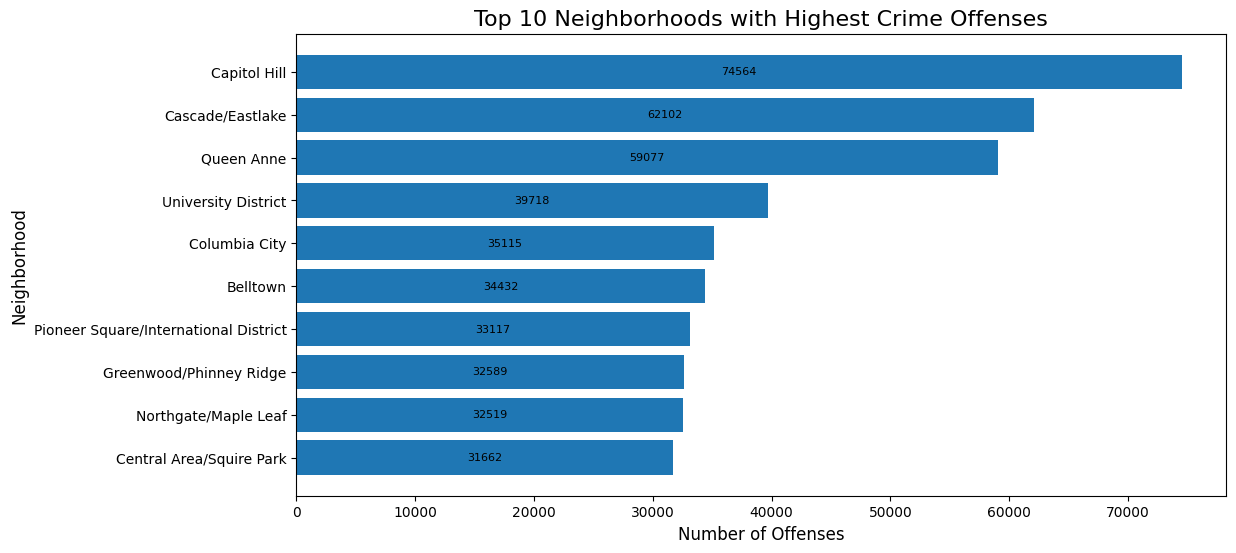

In [ ]:
#Bar Chart for top 10 neighborhoods with highest crime offenses

#Selecting the top 10 neighborhoods with the highest crime counts
nei_largest_counts_df = cra.nlargest(10, 'total_crime_count').sort_values(by=['total_crime_count'], ascending=True)

#Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
plt.barh(nei_largest_counts_df['GEN_ALIAS'], nei_largest_counts_df['total_crime_count'])
plt.xlabel("Number of Offenses", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)
plt.title("Top 10 Neighborhoods with Highest Crime Offenses", fontsize=16)
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', fontsize=8)
plt.show()

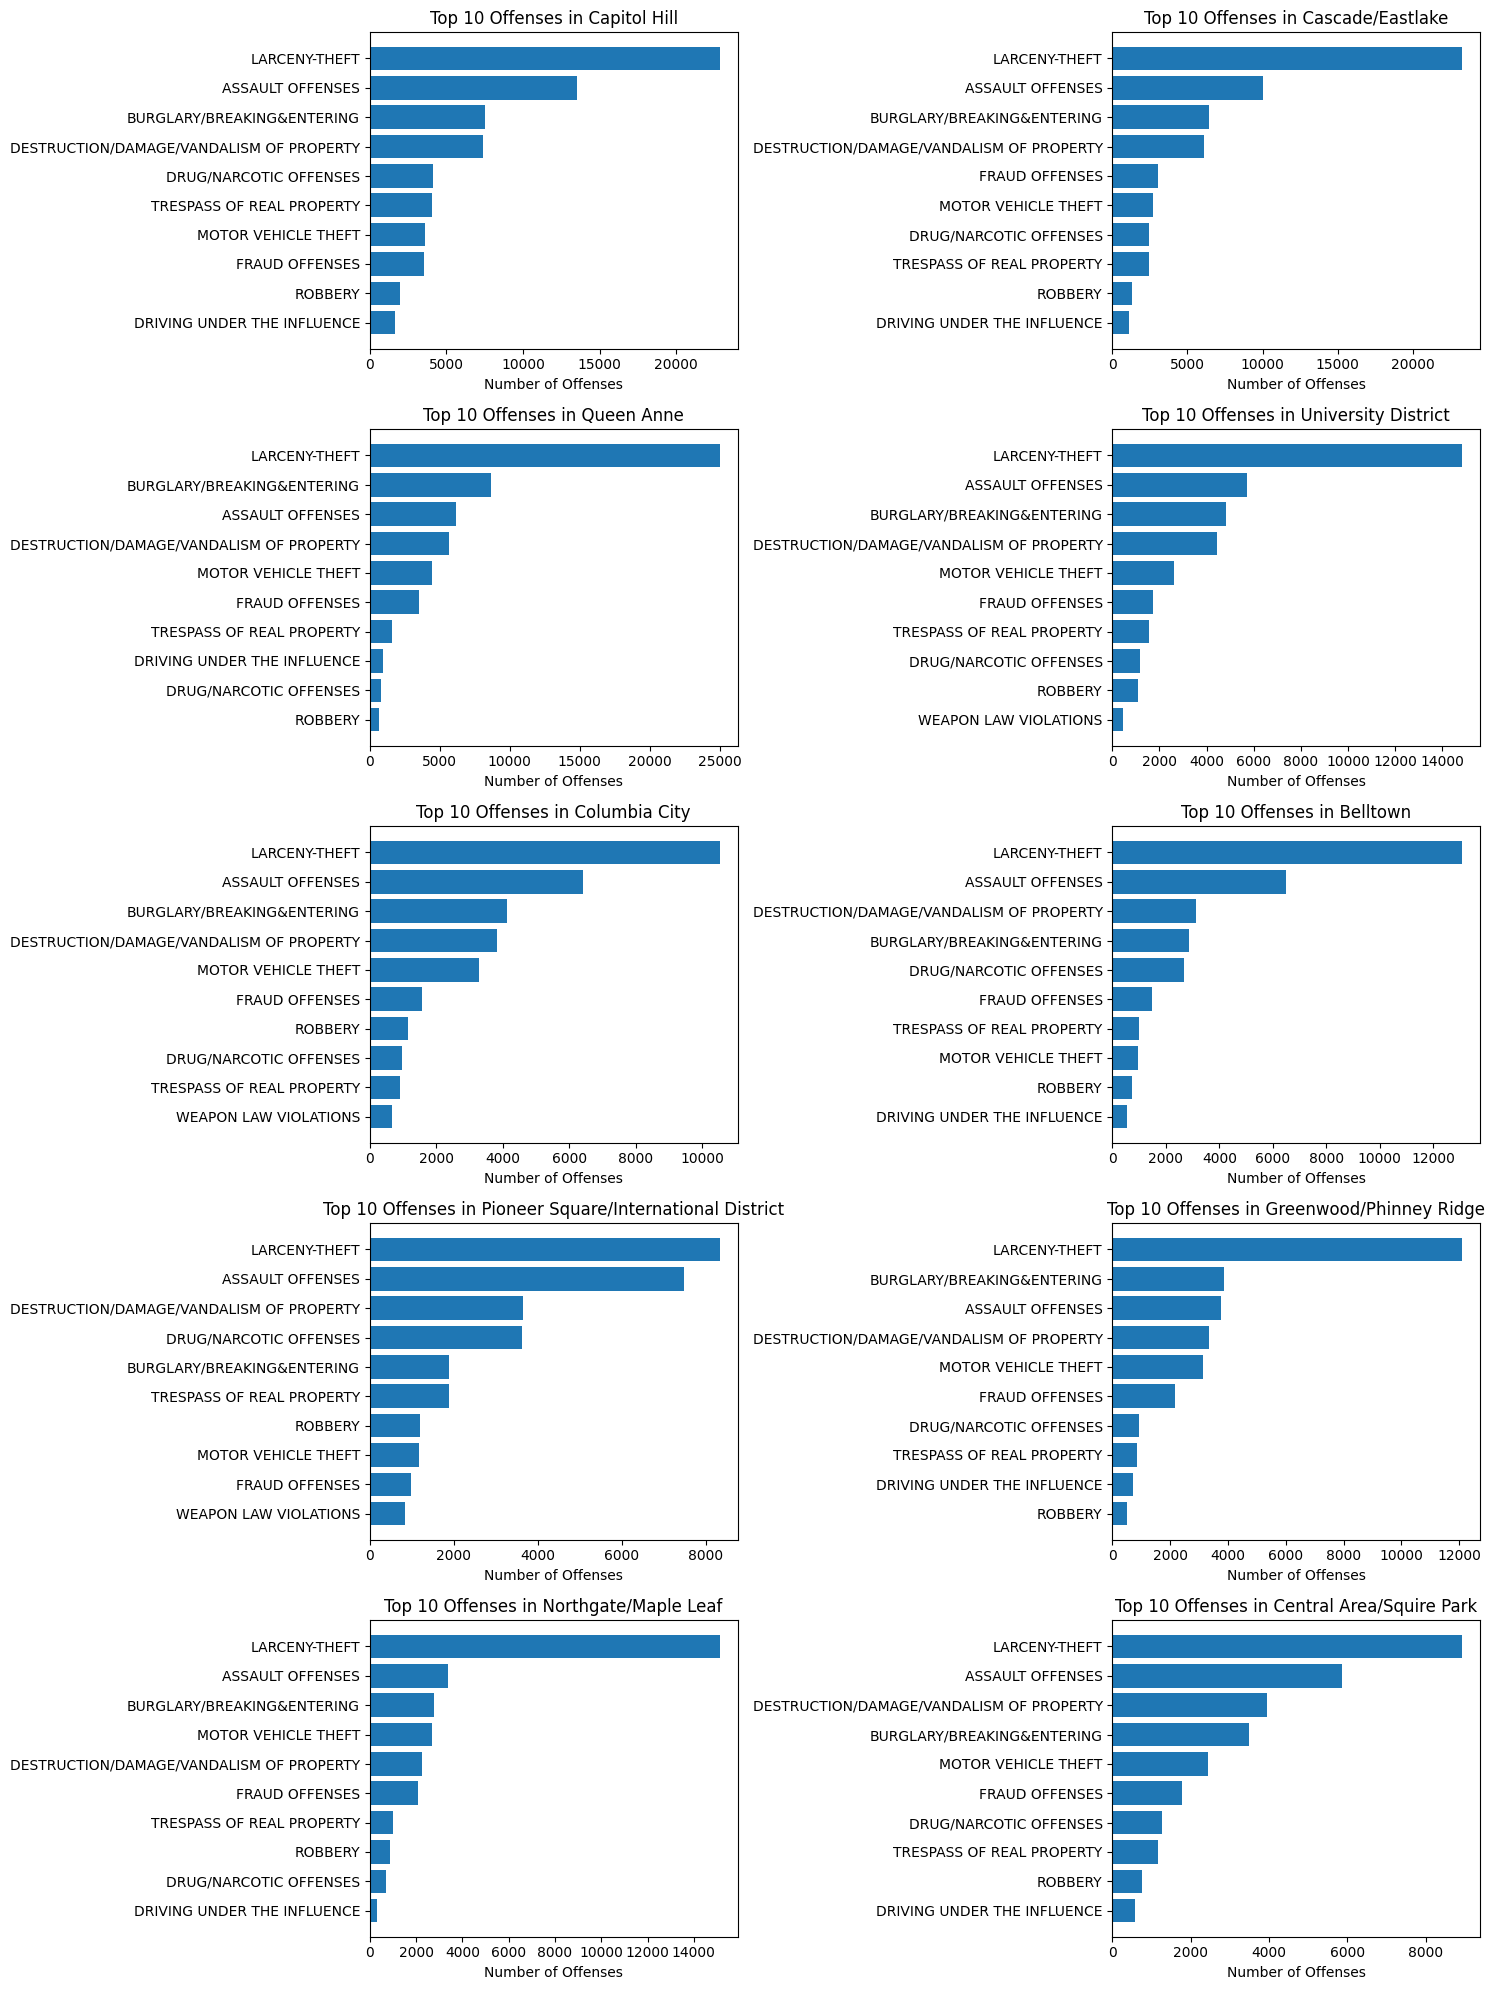

In [ ]:
#Bar charts for top 10 offenses in top 10 neighborhoods

#Grouping neighborhood (CRA_NO) and Offense Parent Group
offense_counts = point_in_census.groupby(['CRA_NO', 'Offense Parent Group_x']).size().reset_index(name='counts')

#Getting top 10 neighborhoods by total crime count
top_10_neighborhoods = cra.nlargest(10, 'total_crime_count')['CRA_NO'].tolist()

#Counting the number of offenses for the top 10 neighborhoods
top_neighborhood_offenses = offense_counts[offense_counts['CRA_NO'].isin(top_10_neighborhoods)]

#Getting top 10 offense types for each of the top 10 neighborhoods
top_offenses_per_neighborhood = {}
for neighborhood in top_10_neighborhoods:
    neighborhood_offenses = top_neighborhood_offenses[top_neighborhood_offenses['CRA_NO'] == neighborhood].nlargest(10, 'counts')
    top_offenses_per_neighborhood[neighborhood] = neighborhood_offenses

#Plotting the bar chart
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for i, neighborhood in enumerate(top_10_neighborhoods):
    neighborhood_name = cra[cra['CRA_NO'] == neighborhood]['GEN_ALIAS'].iloc[0]
    ax = axes[i]
    ax.barh(top_offenses_per_neighborhood[neighborhood]['Offense Parent Group_x'], top_offenses_per_neighborhood[neighborhood]['counts'])
    ax.set_title(f'Top 10 Offenses in {neighborhood_name}')
    ax.set_xlabel('Number of Offenses')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
pov = pd.read_csv('/content/drive/MyDrive/B17001_pop_poverty_status_5YALL_5531829710008480567.csv')

In [ ]:
pov.isnull().sum()

,0
OBJECTID,0
GEOID,0
Tract Name,0
Total population for whom poverty status is determined,0
Below poverty level,0
...,...
Jurisdiction,0
Community Reporting Area ID,1481
Community Reporting Area Group,1481
Community Reporting Area Name,1481


In [ ]:
pov = pov.dropna()

In [ ]:
pov.shape

(795, 69)

In [ ]:
columns_to_remove = [
    'Below poverty level Male Under 5 years',
    'Below poverty level Male 5 years',
    'Below poverty level Male 6 to 11 years',
    'Below poverty level Male 12 to 14 years',
    'Below poverty level Male 15 years',
    'Below poverty level Male 16 and 17 years',
    'Below poverty level Male 18 to 24 years',
    'Below poverty level Male 25 to 34 years',
    'Below poverty level Male 35 to 44 years',
    'Below poverty level Male 45 to 54 years',
    'Below poverty level Male 55 to 64 years',
    'Below poverty level Male 65 to 74 years',
    'Below poverty level Male 75 years and over',
    'Below poverty level Female Under 5 years',
    'Below poverty level Female 5 years',
    'Below poverty level Female 6 to 11 years',
    'Below poverty level Female 12 to 14 years',
    'Below poverty level Female 15 years',
    'Below poverty level Female 16 and 17 years',
    'Below poverty level Female 18 to 24 years',
    'Below poverty level Female 25 to 34 years',
    'Below poverty level Female 35 to 44 years',
    'Below poverty level Female 45 to 54 years',
    'Below poverty level Female 55 to 64 years',
    'Below poverty level Female 65 to 74 years',
    'Below poverty level Female 75 years and over',
    'At or above poverty level Male Under 5 years',
    'At or above poverty level Male 5 years',
    'At or above poverty level Male 6 to 11 years',
    'At or above poverty level Male 12 to 14 years',
    'At or above poverty level Male 15 years',
    'At or above poverty level Male 16 and 17 years',
    'At or above poverty level Male 18 to 24 years',
    'At or above poverty level Male 25 to 34 years',
    'At or above poverty level Male 35 to 44 years',
    'At or above poverty level Male 45 to 54 years',
    'At or above poverty level Male 55 to 64 years',
    'At or above poverty level Male 65 to 74 years',
    'At or above poverty level Male 75 years and over',
    'At or above poverty level Female Under 5 years',
    'At or above poverty level Female 5 years',
    'At or above poverty level Female 6 to 11 years',
    'At or above poverty level Female 12 to 14 years',
    'At or above poverty level Female 15 years',
    'At or above poverty level Female 16 and 17 years',
    'At or above poverty level Female 18 to 24 years',
    'At or above poverty level Female 25 to 34 years',
    'At or above poverty level Female 35 to 44 years',
    'At or above poverty level Female 45 to 54 years',
    'At or above poverty level Female 55 to 64 years',
    'At or above poverty level Female 65 to 74 years',
    'At or above poverty level Female 75 years and over',
    'ACS Vintage', 'Tract Label','GEOID', 'Tract Name',

]

pov = pov.drop(columns=columns_to_remove)

In [ ]:
pov.columns

Index(['OBJECTID', 'Total population for whom poverty status is determined',
       'Below poverty level', 'Below poverty level Male',
       'Below poverty level Female', 'At or above poverty level',
       'At or above poverty level Male', 'At or above poverty level Female',
       'Jurisdiction', 'Community Reporting Area ID',
       'Community Reporting Area Group', 'Community Reporting Area Name',
       'Community Reporting Area Neighborhoods'],
      dtype='object')

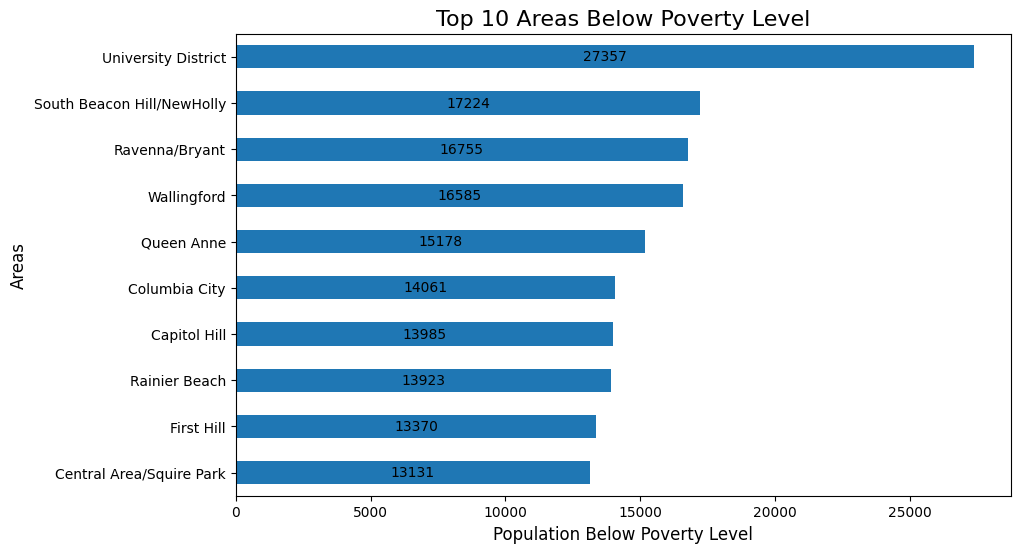

In [ ]:
# Group by 'Community Reporting Area Neighborhoods' and sum the poverty levels
top_poverty_neighborhoods = pov.groupby('Community Reporting Area Name')['Below poverty level'].sum()

# Get the top 10 neighborhoods with the highest poverty levels
top_10_poverty_neighborhoods = top_poverty_neighborhoods.nlargest(10)

# Group by 'Community Reporting Area Neighborhoods' and sum the poverty levels
top_poverty_neighborhoods = pov.groupby('Community Reporting Area Name')['Below poverty level'].sum()

# Get the top 10 neighborhoods with the highest poverty levels
top_10_poverty_neighborhoods = top_poverty_neighborhoods.nlargest(10)

# Plotting the top 10 neighborhoods below the poverty level
fig, ax = plt.subplots(figsize=(10, 6))
bars = top_10_poverty_neighborhoods.sort_values(ascending=True)

# Create a horizontal bar plot
bars.plot(kind='barh', ax=ax)

# Add numbers on the bars
ax.bar_label(ax.containers[0], fmt='%d', label_type='center')

# Customize the plot
ax.set_title('Top 10 Areas Below Poverty Level', fontsize=16)
ax.set_ylabel('Areas', fontsize=12)
ax.set_xlabel('Population Below Poverty Level', fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()


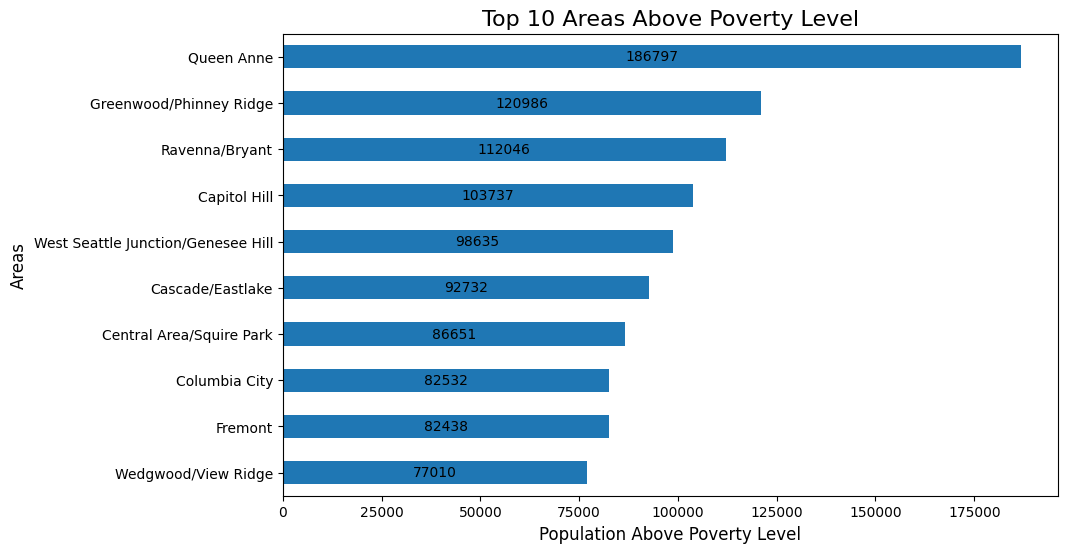

In [ ]:
# Group by 'Community Reporting Area Neighborhoods' and sum the poverty levels
top_poverty_neighborhoods = pov.groupby('Community Reporting Area Name')['At or above poverty level'].sum()

# Get the top 10 neighborhoods with the highest poverty levels
top_10_poverty_neighborhoods = top_poverty_neighborhoods.nlargest(10)

# Group by 'Community Reporting Area Neighborhoods' and sum the poverty levels
top_poverty_neighborhoods = pov.groupby('Community Reporting Area Name')['At or above poverty level'].sum()

# Get the top 10 neighborhoods with the highest poverty levels
top_10_poverty_neighborhoods = top_poverty_neighborhoods.nlargest(10)

# Plotting the top 10 neighborhoods below the poverty level
fig, ax = plt.subplots(figsize=(10, 6))
bars = top_10_poverty_neighborhoods.sort_values(ascending=True)

# Create a horizontal bar plot
bars.plot(kind='barh', ax=ax)

# Add numbers on the bars
ax.bar_label(ax.containers[0], fmt='%d', label_type='center')

# Customize the plot
ax.set_title('Top 10 Areas Above Poverty Level', fontsize=16)
ax.set_ylabel('Areas', fontsize=12)
ax.set_xlabel('Population Above Poverty Level', fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()


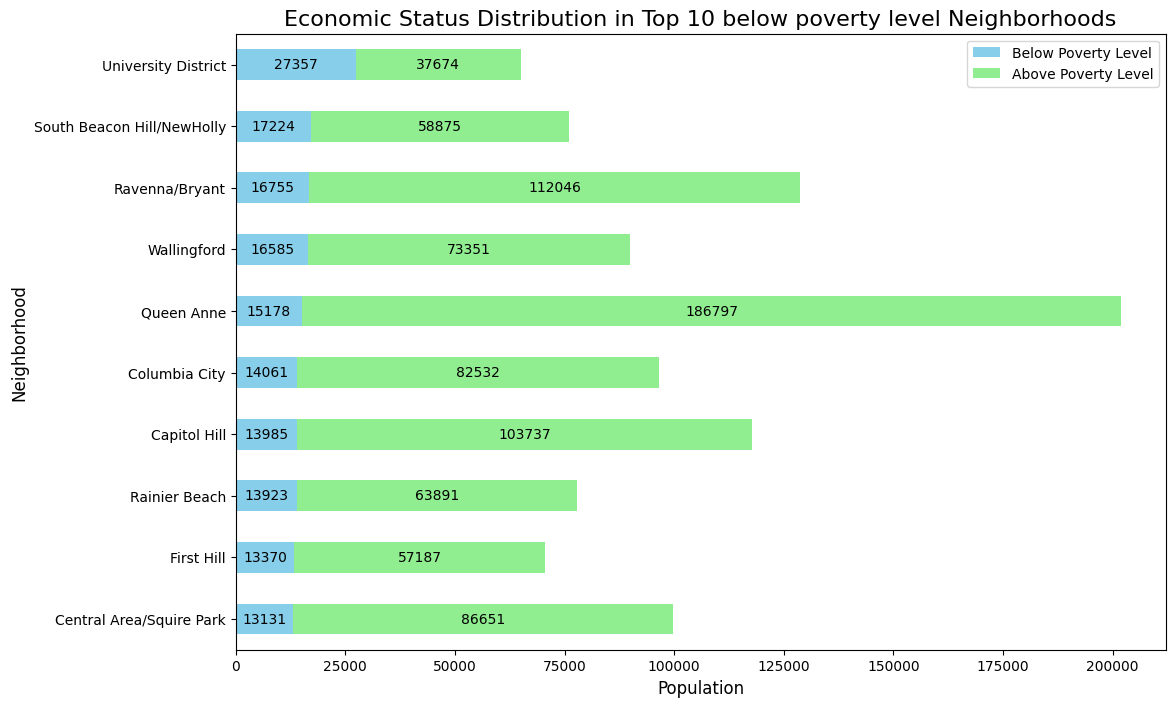

In [ ]:
# Aggregate data for below and above poverty levels using 'Community Reporting Area Name'
poverty_levels = pov.groupby('Community Reporting Area Name')[['Below poverty level', 'At or above poverty level']].sum()
top_10_poverty_areas = poverty_levels.nlargest(10, 'Below poverty level')

# Sort the data by 'Below poverty level' first, and 'At or above poverty level' next
top_10_poverty_areas = top_10_poverty_areas.sort_values(by=['Below poverty level', 'At or above poverty level'], ascending=True)

# Plotting the stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
top_10_poverty_areas.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightgreen'])

# Add numbers on the bars
for i in range(len(top_10_poverty_areas)):
    below = top_10_poverty_areas.iloc[i, 0]
    above = top_10_poverty_areas.iloc[i, 1]
    ax.text(below / 2, i, f'{below}', va='center', ha='center', color='black', fontsize=10)
    ax.text(below + (above / 2), i, f'{above}', va='center', ha='center', color='black', fontsize=10)

# Customize the plot
ax.set_title('Economic Status Distribution in Top 10 below poverty level Neighborhoods', fontsize=16)
ax.set_xlabel('Population', fontsize=12)
ax.set_ylabel('Neighborhood', fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(['Below Poverty Level', 'Above Poverty Level'], loc='upper right')
plt.show()

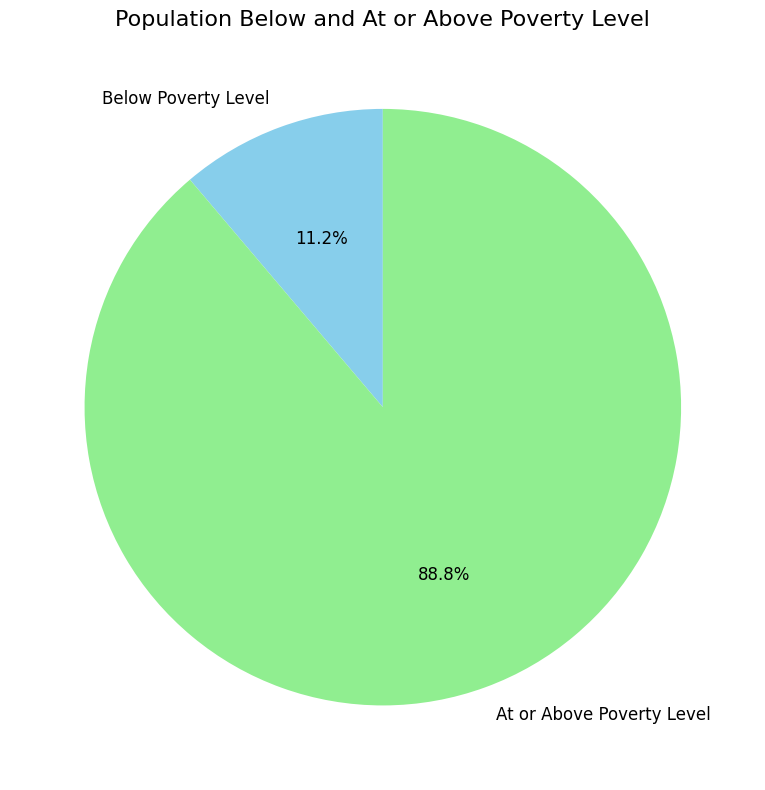

In [ ]:
# Aggregate data for below and above poverty levels using 'Jurisdiction'
poverty_by_jurisdiction = pov.groupby('Jurisdiction')[['Below poverty level', 'At or above poverty level']].sum()
total_poverty = poverty_by_jurisdiction.sum()  # Sum across all jurisdictions

# Prepare data for the pie chart
labels = ['Below Poverty Level', 'At or Above Poverty Level']
sizes = [total_poverty['Below poverty level'], total_poverty['At or above poverty level']]
colors = ['skyblue', 'lightgreen']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Population Below and At or Above Poverty Level', fontsize=16)
plt.tight_layout()
plt.show()

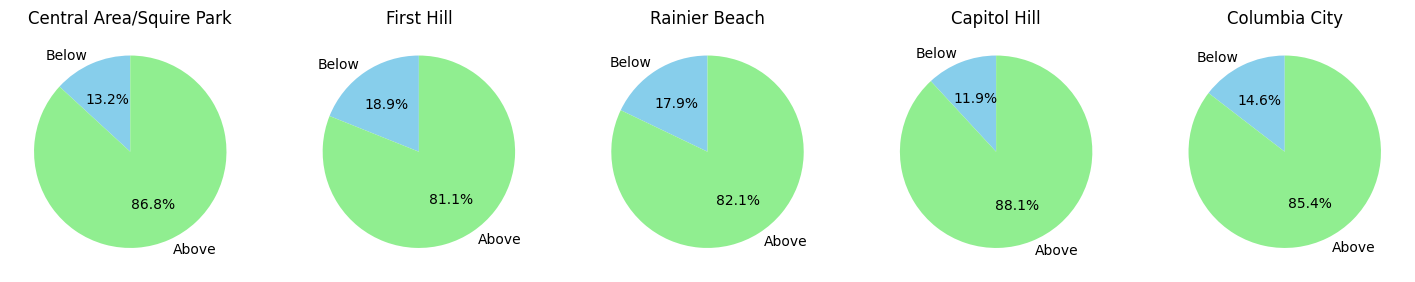

In [ ]:
# Create pie charts for each top 5 community area
top_5_poverty_areas = top_10_poverty_areas.head(5)  # Limit to 5 for better readability
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

for i, (area, data) in enumerate(top_5_poverty_areas.iterrows()):
    sizes = [data['Below poverty level'], data['At or above poverty level']]
    labels = ['Below', 'Above']
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
    axes[i].set_title(area)

plt.show()

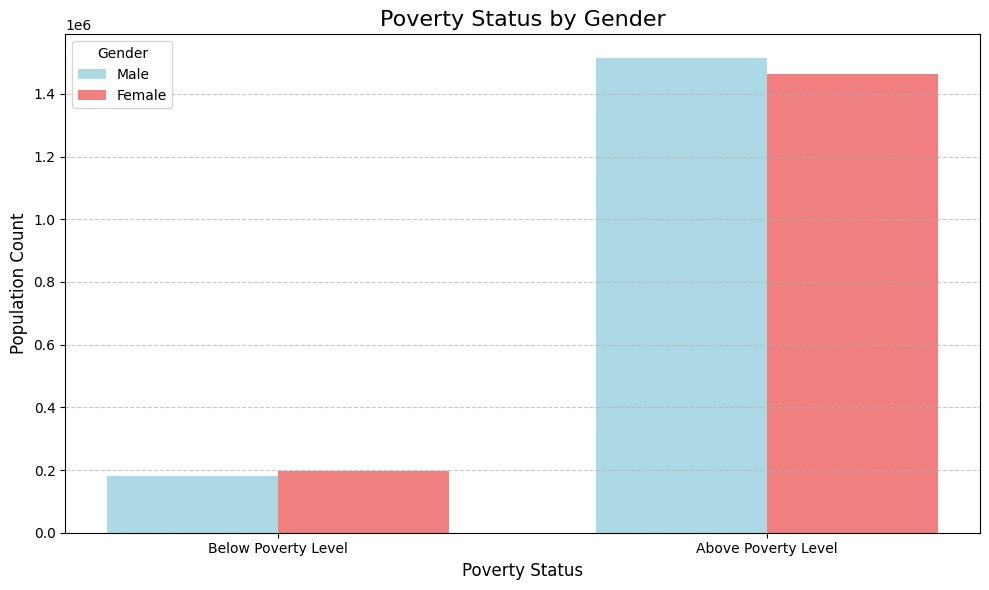

In [ ]:
#considered Below Poverty Level,Above Poverty Level for male and female
categories = ['Below Poverty Level', 'Above Poverty Level']
male_counts = [
    pov['Below poverty level Male'].sum(),
    pov['At or above poverty level Male'].sum()
]
female_counts = [
    pov['Below poverty level Female'].sum(),
    pov['At or above poverty level Female'].sum()
]

x = np.arange(len(categories))  # Number of categories
width = 0.35

#plotting graph
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, male_counts, width, label='Male', color='lightblue')
plt.bar(x + width/2, female_counts, width, label='Female', color='lightcoral')
plt.title('Poverty Status by Gender', fontsize=16)
plt.xlabel('Poverty Status', fontsize=12)
plt.ylabel('Population Count', fontsize=12)
plt.xticks(x, categories, fontsize=10)
plt.legend(title='Gender', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

